<a href="https://colab.research.google.com/github/JSEFERINO/JSEFERINO/blob/main/DOEJH7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Diseño completamente al azar usando Python**


## **Problema de aplicación.** *Supóngase un estudio en el que se quiere comprobar si el precio de la compra varía entre 4 cadenas de supermercado. Para ello, se selecciona una serie de elementos de la compra cotidiana y se registra su valor en cada uno de los supermercados ¿Existen evidencias de que el precio medio de la compra es diferente dependiendo del supermercado?*



# **Librerias**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from statsmodels.formula.api import ols
from statsmodels.graphics.factorplots import interaction_plot

In [ ]:
!pip install pingouin

In [ ]:
import pingouin as pg

# **Ingresando los datos en Pytho**

In [ ]:
producto  =  [ "lechuga" ,  "papas" ,  "leche" ,  "huevos" ,  "pan" ,  "cereal" ,  "carne.molida" , "tomate.sopa", "lavandería.detergente" , " aspirina" ] 
            
Tienda_A = [ 1.755 , 2.655 , 2.235 , 0.975 , 2.370 , 4.695 , 3.135 , 0.930 , 8.235 , 6.690 ]
Tienda_B = [ 1.78,  1.98 ,  1.69 ,  0.99 ,  1.70 ,  3.15 ,  1.88 ,  0.65 ,  5.99 ,  4.84 ] 
Tienda_C  =  [ 1.29 ,  1.99 ,  1.79 ,  0.69 ,  1.89 ,  2.99 ,  2.09 ,  0.65 ,  5.99 ,  4.99 ] 
Tienda_D  =  [ 1.29 ,  1.99 ,  1.59 ,  1.09 ,  1.89 , 3.09 ,  2.49 ,  0.69 ,  6.99 ,  5.15 ] 

In [ ]:
datos  =  pd . DataFrame ({ 
    'producto' : producto  *  4 , 
    'tienda' :  np . repeat ([ 'A' ,  'B' ,  'C' ,  'D' ],  10 ), 
    'precio' :  Tienda_A  +  Tienda_B  +  Tienda_C  +  Tienda_D 
}) 


In [ ]:
datos

,producto,tienda,precio
0,lechuga,A,1.755
1,papas,A,2.655
2,leche,A,2.235
3,huevos,A,0.975
4,pan,A,2.370
5,cereal,A,4.695
6,carne.molida,A,3.135
7,tomate.sopa,A,0.930
8,lavandería.detergente,A,8.235
9,aspirina,A,6.690


## ***Análisis descriptivo y gráfico***


En primer lugar, se generan los diagramas Box-plot para identificar posibles diferencias notables, asimetrías, valores atípicos y homogeneidad de varianza entre los distintos *niveles*. Se calcula también la media y varianza de cada grupo.

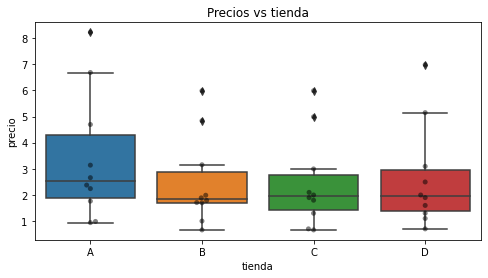

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.set_title('Precios vs tienda')
sns.boxplot(x="tienda", y="precio", data=datos, ax=ax)
sns.swarmplot(x="tienda", y="precio", data=datos, color='black', alpha=0.5, ax=ax);

In [ ]:
print('Precio medios y desviación típica por tienda')
datos.groupby('tienda')['precio'].agg(['mean', 'std'])

Precio medios y desviación típica por tienda


,mean,std
tienda,,
A,3.3675,2.440371
B,2.4650,1.707430
C,2.4360,1.765296
D,2.6260,1.987758


## **Test ANOVA**

In [ ]:
# Test ANOVA de dos vías (Two-way ANOVA)
# ==============================================================================
pg.rm_anova(
    data       = datos,
    dv         = 'precio',
    within     = 'tienda',
    subject    = 'producto',
    detailed   = True,
    correction = 'auto'
).round(4)

,Source,SS,DF,MS,F,p-unc,p-GG-corr,ng2,eps,sphericity,W-spher,p-spher
0,tienda,5.7372,3,1.9124,13.0252,0.0,0.0017,0.0385,0.4682,False,0.129,0.0079
1,Error,3.9642,27,0.1468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Dado que la esfericidad no se cumple (sphericity = False), hay que utilizar el p-value corregido, que está en la columna p-GG-corr. El análisis de varianza muestra evidencias significativas con un tamaño de efecto grande.

## ***Comparaciones múltiples***


Al tratarse de datos pareados, no se pueden calcular los intervalos Tukey HSD. En su lugar, se pueden utilizar t-test pareados.

In [ ]:
# Post-hoc pairwise t-test
# ==============================================================================
pg.pairwise_ttests(
    dv      = 'precio',
    within  = 'tienda',
    subject = 'producto',
    padjust = 'holm',
    data    = datos
)

/usr/local/lib/python3.7/dist-packages/pingouin/pairwise.py:27: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,tienda,A,B,True,True,3.630938,9.0,two-sided,0.005478,0.021910,holm,10.073,0.410424
1,tienda,A,C,True,True,4.166418,9.0,two-sided,0.002424,0.013625,holm,19.615,0.418894
2,tienda,A,D,True,True,4.210567,9.0,two-sided,0.002271,0.013625,holm,20.701,0.319091
3,tienda,B,C,True,True,0.405600,9.0,two-sided,0.694510,0.694510,holm,0.331,0.015994
4,tienda,B,D,True,True,-1.242763,9.0,two-sided,0.245358,0.490715,holm,0.571,-0.083219
5,tienda,C,D,True,True,-1.770733,9.0,two-sided,0.110379,0.331137,holm,0.983,-0.096803


## ***Conclusión***


El análisis ANOVA (incluyendo las correcciones dada la falta de esfericidad) encuentra diferencias significativas en el precio de los alimentos entre al menos 2 tiendas, siendo el tamaño del efecto grande. La posterior comparación dos a dos por t-student con corrección de significancia holm identifica como significativas las diferencias entre las tiendas A-B, A-C y A-D pero no entre B-C, B-D y C-D.

## ***Comprobación de supuestos de normalidad***
Antes de realizar la prueba de hipótesis, verificamos si se cumplen los supuestos para la prueba de hipótesis ANOVA unidireccional. Las muestras son muestras aleatorias e independientes. Ahora, verificamos la suposición de normalidad trazando un gráfico de probabilidad normal ( gráficos QQ ) para cada variable agrupada.

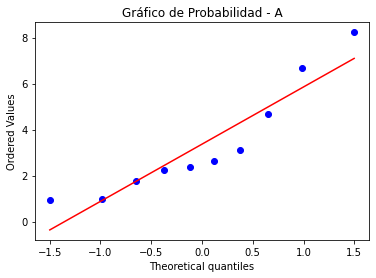

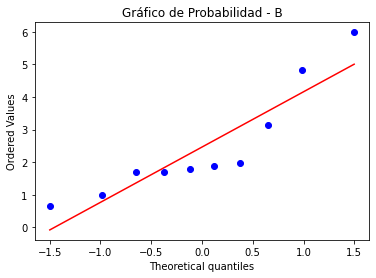

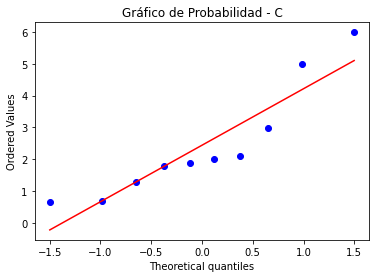

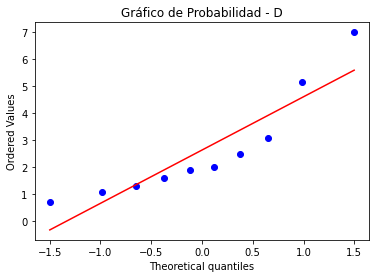

In [ ]:
import numpy as np 
import scipy.stats as stats
import matplotlib.pyplot as plt

unique_tienda = datos['tienda'].unique()
for tienda in unique_tienda:
    stats.probplot(datos[datos['tienda'] == tienda]['precio'], dist="norm", plot=plt)
    plt.title("Gráfico de Probabilidad - "+tienda)
    plt.show()

## **Homogeneidad de la varianza Verificación de supuestos**

In [ ]:
# calculate ratio of the largest to the smallest sample standard deviation
ratio = datos.groupby('tienda').std().max() / datos.groupby('tienda').std().min()
ratio

precio    1.429266
dtype: float64

In [ ]:
# Create ANOVA backbone table
data = [['Between Groups', '', '', '', '', '', ''], ['Within Groups', '', '', '', '', '', ''], ['Total', '', '', '', '', '', '']] 
anova_table = pd.DataFrame(data, columns = ['Source of Variation', 'SS', 'df', 'MS', 'F', 'P-value', 'F crit']) 
anova_table.set_index('Source of Variation', inplace = True)

# calculate SSTR and update anova table
x_bar = datos['precio'].mean()
SSTR = datos.groupby('tienda').count() * (datos.groupby('tienda').mean() - x_bar)**2
anova_table['SS']['Between Groups'] = SSTR['precio'].sum()

# calculate SSE and update anova table
SSE = (datos.groupby('tienda').count() - 1) * datos.groupby('tienda').std()**2
anova_table['SS']['Within Groups'] = SSE['precio'].sum()

# calculate SSTR and update anova table
SSTR = SSTR['precio'].sum() + SSE['precio'].sum()
anova_table['SS']['Total'] = SSTR

# update degree of freedom
anova_table['df']['Between Groups'] = datos['tienda'].nunique() - 1
anova_table['df']['Within Groups'] = datos.shape[0] - datos['tienda'].nunique()
anova_table['df']['Total'] = datos.shape[0] - 1

# calculate MS
anova_table['MS'] = anova_table['SS'] / anova_table['df']

# calculate F 
F = anova_table['MS']['Between Groups'] / anova_table['MS']['Within Groups']
anova_table['F']['Between Groups'] = F

# p-value
anova_table['P-value']['Between Groups'] = 1 - stats.f.cdf(F, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

# F critical 
alpha = 0.05
# possible types "right-tailed, left-tailed, two-tailed"
tail_hypothesis_type = "two-tailed"
if tail_hypothesis_type == "two-tailed":
    alpha /= 2
anova_table['F crit']['Between Groups'] = stats.f.ppf(1-alpha, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

# Final ANOVA Table
anova_table

,SS,df,MS,F,P-value,F crit
Source of Variation,,,,,,
Between Groups,5.737207,3,1.912402,0.479955,0.698253,3.504685
Within Groups,143.443643,36,3.984546,,,
Total,149.180849,39,3.82515,,,
